In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import file
df = pd.read_csv('all_df.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Drop columns that we don't want to use in prediction
df = df.drop(df.index[358]).reset_index(drop=True)
df = df.drop(['Unnamed: 0', 'Date', 'Revenue', 'Users', 'Sessions', 'Transactions', 'Quantity', 'Bounces', 'Pages / Session',
              'Session Duration', 'Avg. Session Duration Seconds', "('Users', '(Other)')", "('Users', 'Affiliate')","('Users', 'CSE')",
             "('Users', 'Direct')", "('Users', 'Display')", "('Users', 'Email')","('Users', 'Organic Search')", 
             "('Users', 'Organic Social')", "('Users', 'Paid Search')", "('Users', 'Paid Social')", "('Users', 'Partnerships')",
             "('Users', 'Referral')","('Users', 'Social')", "('Revenue', '(Other)')", "('Revenue', 'Affiliate')",
             "('Revenue', 'CSE')", "('Revenue', 'Direct')", "('Revenue', 'Display')", "('Revenue', 'Email')",
             "('Revenue', 'Organic Search')", "('Revenue', 'Organic Social')", "('Revenue', 'Paid Search')",
             "('Revenue', 'Paid Social')", "('Revenue', 'Partnerships')", "('Revenue', 'Referral')","('Revenue', 'Social')",
             "('Transactions', '(Other)')", "('Transactions', 'Affiliate')","('Transactions', 'CSE')", "('Transactions', 'Direct')",
             "('Transactions', 'Display')", "('Transactions', 'Email')","('Transactions', 'Organic Search')",
             "('Transactions', 'Organic Social')", "('Transactions', 'Paid Search')", "('Transactions', 'Paid Social')", 
             "('Transactions', 'Partnerships')", "('Transactions', 'Referral')","('Transactions', 'Social')","('Users', 'desktop')", 
             "('Users', 'mobile')","('Users', 'tablet')", "('Revenue', 'desktop')", "('Revenue', 'mobile')","('Revenue', 'tablet')", "('Transactions', 'desktop')", 
             "('Transactions', 'mobile')","('Transactions', 'tablet')", "('Spend', 'Affiliate')", "('Spend', 'CSE')",
             "('Spend', 'Display')", "('Spend', 'PLA')", "('Spend', 'Paid Search')", "('Spend', 'Paid Social')"], axis=1)

#
df = df.replace([np.inf], np.nan)
df = df.fillna(0)
df.head()

,Revenue Yesterday,Revenue Two Days Ago,Users Yesterday,Users Two Days Ago,Sessions Yesterday,Sessions Two Days Ago,Transactions Yesterday,Transactions Two Days Ago,Quantity Yesterday,Quantity Two Days Ago,...,"('Spend PSocial Yesterday', '')","('Spend PSocial Two Days Ago', '')","('Spend PSocial LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,Orders Goal Reached Yesterday,Units Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
0,628780.30,525294.24,224137.0,238026.0,278830.0,288792.0,4119.0,3352.0,4726.0,4525.0,...,2893.22,3194.77,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1221370.25,628780.30,306549.0,224137.0,379353.0,278830.0,7667.0,4119.0,10094.0,4726.0,...,10783.70,2893.22,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,704274.10,1221370.25,233431.0,306549.0,281685.0,379353.0,5025.0,7667.0,7252.0,10094.0,...,3449.71,10783.70,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,619297.48,704274.10,282736.0,233431.0,345140.0,281685.0,4597.0,5025.0,6169.0,7252.0,...,3945.31,3449.71,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,636135.35,619297.48,259674.0,282736.0,321574.0,345140.0,5004.0,4597.0,6776.0,6169.0,...,4430.08,3945.31,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Create the column to be predicted
y = df['Rev Goal Reached'].values
X = df.drop('Rev Goal Reached', axis = 1).values

#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

In [13]:
#knn method
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

print "Accuracy Score:", knn.score(X_test, y_test)

Test set predictions:
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0]
Accuracy Score: 0.721518987342


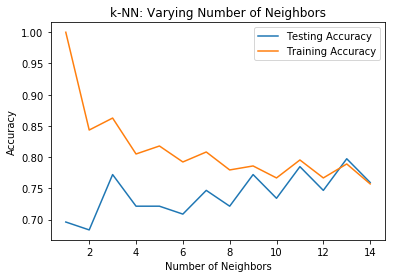

In [14]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#knn method with number of neighbors = 6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

print "Accuracy Score Train:", knn.score(X_train, y_train)
print "Accuracy Score Test:", knn.score(X_test, y_test)

Test set predictions:
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0]
Accuracy Score Train: 0.792332268371
Accuracy Score Test: 0.708860759494


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

#Classification Report
print(classification_report(y_test, y_pred))

[[51  3]
 [20  5]]
             precision    recall  f1-score   support

          0       0.72      0.94      0.82        54
          1       0.62      0.20      0.30        25

avg / total       0.69      0.71      0.65        79



In [25]:
#Create a new dataset with 0 in for spend when spend was < 0
for k, v in df.iteritems():
    v[v < 0] = 0
    

print df.head()

#Create the column to be predicted
y1 = df['Rev Goal Reached'].values
X1 = df.drop('Rev Goal Reached', axis = 1).values

#Split the data into training and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 21, stratify=y)

#clf
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train1, y_train1)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
acc_train = clf.score(X_train1, y_train1)
acc_test = clf.score(X_test1, y_test1)

print 'Accuracy Score Training Set:', acc_train
print 'Accuracy Score Test Set:', acc_test


C:\Users\jrenaud\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


   Revenue Yesterday  Revenue Two Days Ago  Users Yesterday  \
0          628780.30             525294.24         224137.0   
1         1221370.25             628780.30         306549.0   
2          704274.10            1221370.25         233431.0   
3          619297.48             704274.10         282736.0   
4          636135.35             619297.48         259674.0   

   Users Two Days Ago  Sessions Yesterday  Sessions Two Days Ago  \
0            238026.0            278830.0               288792.0   
1            224137.0            379353.0               278830.0   
2            306549.0            281685.0               379353.0   
3            233431.0            345140.0               281685.0   
4            282736.0            321574.0               345140.0   

   Transactions Yesterday  Transactions Two Days Ago  Quantity Yesterday  \
0                  4119.0                     3352.0              4726.0   
1                  7667.0                     4119.0        

In [26]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[43 11]
 [10 15]]
             precision    recall  f1-score   support

          0       0.81      0.80      0.80        54
          1       0.58      0.60      0.59        25

avg / total       0.74      0.73      0.74        79



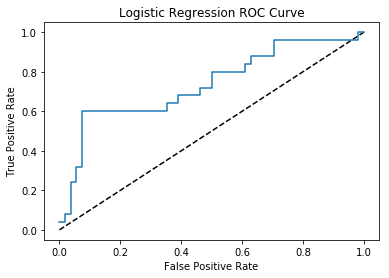

In [27]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show();

In [28]:
#Compute AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)

print "ROC AUC:", roc_auc

ROC AUC: 0.734814814815


In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring ='roc_auc')

print "AUC scores computed using 5-fold cross-validation: {}".format(cv_scores)

AUC scores computed using 5-fold cross-validation: [ 0.78592593  0.54        0.47471698  0.49811321  0.62188679]


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1, 50)}

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print "Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)
print "Best score is {}".format(knn_cv.best_score_)

Tuned Logistic Regression Parameters: {'n_neighbors': 9}
Best score is 0.744897959184


In [31]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_features': 6, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7}
Best score is 0.747448979592
